Author : G Giridharan

GRIP @ The Sparks Foundation

Data Science and Business Analytics Intern

Batch : September, 2023

Task 2 : Prediction using Unsupervised Machine Learning

In this K-means clustering task I tried to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.

## Importing the Libraries

In [16]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA 

## Step 1 - Load the dataset

In [17]:
iris = datasets.load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [18]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [19]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
x = iris.data
y = iris.target

## Step 2 - Visualizing the input data and its Hierarchy

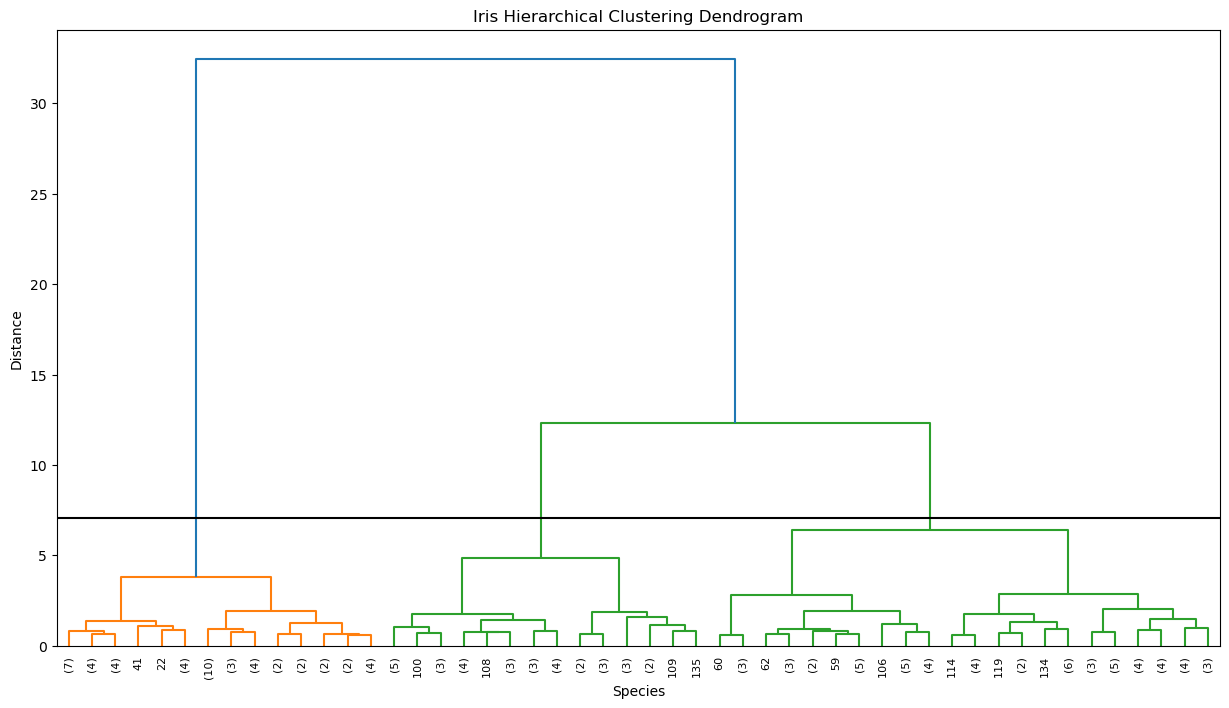

In [21]:
hier = linkage(x, "ward")
max_d = 7.08
plt.figure(figsize=(15, 8))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram(
    hier,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,
    leaf_font_size=8.,
)
plt.axhline(y=max_d, c='k')
plt.show()


## Step 3 - Data Preprocessing

In [22]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [23]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


## Step 4 - Model Training

In [25]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

c:\Users\Admin\anaconda3\envs\Antimoneylaundering\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\envs\Antimoneylaundering\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [26]:
print(iris_k_mean_model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [27]:
print(iris_k_mean_model.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


## Step 5 - Visualizing the Model Cluster

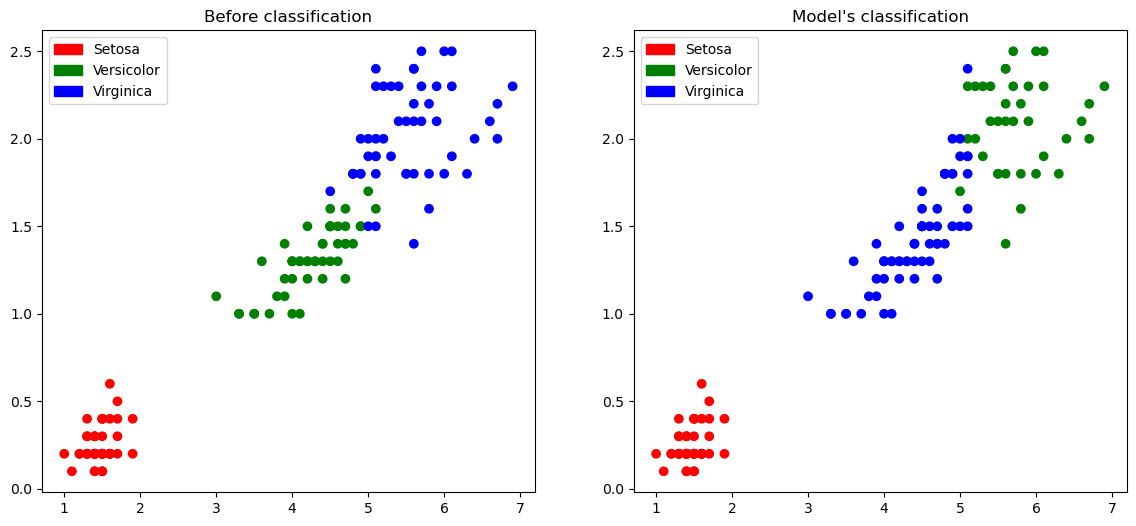

In [28]:
plt.figure(figsize=(14, 6))

colors = np.array(['red', 'green', 'blue'])

# The color patches need to be defined
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

## Step 6 - Calculating the Silhouette score

In [29]:
# Calculate silhouette score
silhouette_avg = sm.silhouette_score(x, iris_k_mean_model.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5528190123564093


In [30]:
## print the cluster centroids and labels

print("Cluster Centers:")
print(iris_k_mean_model.cluster_centers_)

print("Cluster Labels:")
print(iris_k_mean_model.labels_)


Cluster Centers:
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
Cluster Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Conclusion

I was able to successfully carry-out prediction using Unsupervised Machine Learning task and was able to evaluate the model's clustering Silhouette score.

Thank You